# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from datetime import datetime

# Import API key
from config import (openweathermapy,gKey)
import gmaps

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
settings = {"units": "metric", "appid": openweathermapy}
summary = ["name","clouds.all","sys.country","dt","main.humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]
cities_df = pd.DataFrame(["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
print("Beginning Data Retrieval")
print("-----------------------------")
counter = 0
weather_data = []
for city in cities:
    try:
        weather_data.append(ow.get_current(city, **settings))
        counter = counter +1
        print(f"Processing Record {counter} of {len(cities)} | {city}")
    except:
        print(f"City not found. Skipping... {city}")
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 627 | castro
Processing Record 2 of 627 | husavik
City not found. Skipping... louisbourg
Processing Record 3 of 627 | parati
Processing Record 4 of 627 | keflavik
Processing Record 5 of 627 | clyde river
Processing Record 6 of 627 | port elizabeth
Processing Record 7 of 627 | sinnamary
City not found. Skipping... barentsburg
Processing Record 8 of 627 | saint-philippe
Processing Record 9 of 627 | coquimbo
Processing Record 10 of 627 | dunedin
Processing Record 11 of 627 | ati
Processing Record 12 of 627 | kodiak
Processing Record 13 of 627 | hervey bay
Processing Record 14 of 627 | ushuaia
Processing Record 15 of 627 | atuona
Processing Record 16 of 627 | lata
City not found. Skipping... mys shmidta
Processing Record 17 of 627 | rikitea
Processing Record 18 of 627 | new norfolk
Processing Record 19 of 627 | galbshtadt
City not found. Skipping... amderma
Processing Record 20 of 627 | mehamn
Processing Record 2

City not found. Skipping... bengkulu
Processing Record 188 of 627 | kavieng
Processing Record 189 of 627 | clarence town
Processing Record 190 of 627 | adrar
Processing Record 191 of 627 | upington
Processing Record 192 of 627 | tuatapere
Processing Record 193 of 627 | kunming
Processing Record 194 of 627 | concarneau
Processing Record 195 of 627 | port lincoln
Processing Record 196 of 627 | ponta delgada
Processing Record 197 of 627 | kattivakkam
Processing Record 198 of 627 | dobryanka
City not found. Skipping... mayari
Processing Record 199 of 627 | porosozero
Processing Record 200 of 627 | sawtell
Processing Record 201 of 627 | nabire
Processing Record 202 of 627 | punta de bombon
Processing Record 203 of 627 | verkhnevilyuysk
Processing Record 204 of 627 | south lake tahoe
Processing Record 205 of 627 | kristiansund
Processing Record 206 of 627 | torbay
Processing Record 207 of 627 | amuntai
Processing Record 208 of 627 | nyurba
Processing Record 209 of 627 | skopin
Processing Rec

Processing Record 372 of 627 | awjilah
Processing Record 373 of 627 | namatanai
Processing Record 374 of 627 | tilichiki
Processing Record 375 of 627 | birur
Processing Record 376 of 627 | flinders
Processing Record 377 of 627 | kushima
City not found. Skipping... wazzan
Processing Record 378 of 627 | lixourion
Processing Record 379 of 627 | pangnirtung
Processing Record 380 of 627 | nhulunbuy
Processing Record 381 of 627 | filadelfia
Processing Record 382 of 627 | aklavik
Processing Record 383 of 627 | hualmay
Processing Record 384 of 627 | aqtobe
City not found. Skipping... warqla
Processing Record 385 of 627 | qaqortoq
Processing Record 386 of 627 | rawlins
Processing Record 387 of 627 | bonfim
Processing Record 388 of 627 | blackwater
Processing Record 389 of 627 | san rafael
Processing Record 390 of 627 | brookhaven
Processing Record 391 of 627 | coihaique
City not found. Skipping... marcona
Processing Record 392 of 627 | aksu
Processing Record 393 of 627 | beringovskiy
Processing

Processing Record 559 of 627 | kharan
Processing Record 560 of 627 | ranau
Processing Record 561 of 627 | jumla
City not found. Skipping... viligili
Processing Record 562 of 627 | alofi
Processing Record 563 of 627 | itarema
Processing Record 564 of 627 | tura
Processing Record 565 of 627 | sebring
Processing Record 566 of 627 | sambava
-----------------------------
Data Retrieval Complete
-----------------------------


In [4]:
summary = ["name","clouds.all","sys.country","dt","main.humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]
column_names=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]

cities_df = pd.DataFrame(data,columns=column_names)
cities_df["Date"] = pd.to_datetime(cities_df["Date"],unit='s')
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Castro,40,CL,2019-03-19 23:00:00,66,-42.48,-73.76,10.00,2.10
1,Husavik,0,CA,2019-03-19 23:20:47,65,50.56,-96.99,5.00,2.24
2,Parati,40,BR,2019-03-19 23:00:00,88,-20.51,-54.63,25.00,1.00
3,Keflavik,75,IS,2019-03-19 23:16:37,69,64.00,-22.56,2.22,18.00
4,Clyde River,90,CA,2019-03-19 23:12:00,75,70.47,-68.59,-26.00,9.80


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert Raw Data to DataFrame
# Export the city data into a .csv.
cities_df.to_csv(output_data_file)
# Display the DataFrame
cities_df.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

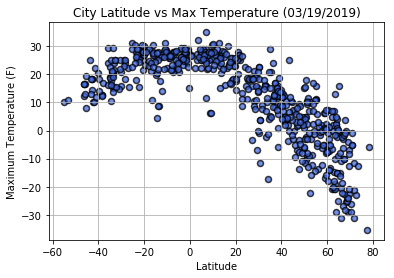

In [6]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(cities_df["Lat"], cities_df["Max Temp"], color="RoyalBlue", edgecolor = 'black',alpha=.75,linewidths=1.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({datetime.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.grid(True)

# Save Figure
plt.savefig("Images/LatitudeMaxTemp-Scatter.png", bbox_inches='tight')

#### Latitude vs. Humidity Plot

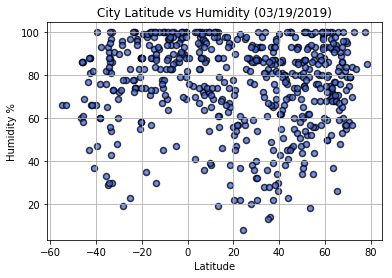

In [7]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(cities_df["Lat"], cities_df["Humidity"], color="RoyalBlue", edgecolor = 'black',alpha=.75,linewidths=1.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({datetime.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid(True)

# Save Figure
plt.savefig("Images/LatitudeHumidity-Scatter.png", bbox_inches='tight')

#### Latitude vs. Cloudiness Plot

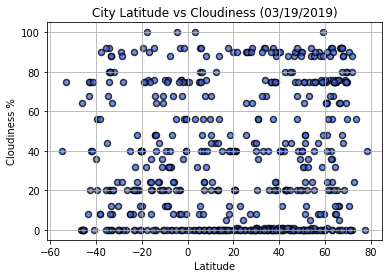

In [8]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], color="RoyalBlue", edgecolor = 'black',alpha=.75,linewidths=1.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({datetime.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)

# Save Figure
plt.savefig("Images/LatitudeCloudiness-Scatter.png", bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

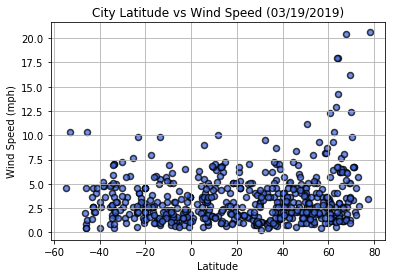

In [9]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], color="RoyalBlue", edgecolor = 'black',alpha=.75,linewidths=1.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({datetime.now().strftime('%m/%d/%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save Figure
plt.savefig("Images/LatitudeWindSpeed-Scatter.png", bbox_inches='tight')

In [13]:
############## Code below is working but I only want to learn how to use gmaps.  ###################################

# gmaps.configure(api_key=gKey)
# # Store latitude and longitude in locations
# locations = cities_df[["Lat", "Lng"]].astype(float)
# humidity = cities_df["Humidity"].astype(float)
# # Plot Heatmap
# fig = gmaps.figure()

# # Create heat layer
# heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
#                                  dissipating=False, max_intensity=10,
#                                  point_radius=1)


# # Add layer
# fig.add_layer(heat_layer)

# # Display figure
# fig =gmaps.figure(layout={
#         'width': '1120px',
#         'height': '420px',
#         'padding': '3px',
#         'border': '1px solid black'
# })
# fig


Figure(layout=FigureLayout(border='1px solid black', height='420px', padding='3px', width='1120px'))